In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataPath = "/Users/yunhyeonchan/AI_Security_Project/Bot_Iot_Data_File/Entire_Dataset/"

In [5]:
! ls /Users/yunhyeonchan/AI_Security_Project/Bot_Iot_Data_File/Entire_Dataset/

UNSW_2018_IoT_Botnet_Dataset_1.csv
UNSW_2018_IoT_Botnet_Dataset_2.csv
UNSW_2018_IoT_Botnet_Dataset_3.csv
UNSW_2018_IoT_Botnet_Dataset_Feature_Names.csv
UNSW_2018_IoT_Botnet_Final_10_Best.csv
UNSW_2018_IoT_Botnet_Final_10_Best.numbers


In [6]:
data = pd.read_csv(dataPath + "UNSW_2018_IoT_Botnet_Final_10_Best.csv", sep = ';')
data = data.drop(columns = ['Unnamed: 0'])

In [17]:
data.head(5)

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [8]:
data.shape

(3668522, 19)

In [9]:
data[['min', 'max', 'mean']]

,min,max,mean
0,0.000000,0.137818,0.068909
1,0.000131,0.000131,0.000131
2,0.000000,0.128988,0.064494
3,0.000000,0.128378,0.064189
4,0.000000,0.127774,0.063887
...,...,...,...
3668517,0.013165,0.013165,0.013165
3668518,0.000574,0.000574,0.000574
3668519,2.874302,2.874302,2.874302
3668520,0.000003,0.000003,0.000003


In [10]:
list(data.columns[:-3])

['pkSeqID',
 'proto',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'seq',
 'stddev',
 'N_IN_Conn_P_SrcIP',
 'min',
 'state_number',
 'mean',
 'N_IN_Conn_P_DstIP',
 'drate',
 'srate',
 'max']

In [11]:
data.category.value_counts()

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

In [12]:
ten_best_features = data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']]
target_features = data[['attack','category','subcategory']]

In [13]:
# Label Encoding the target columns
le = LabelEncoder()
target_features['category'] = le.fit_transform(target_features['category'])
target_features['subcategory'] = le.fit_transform(target_features['subcategory'])

target_features.sample(3)

,attack,category,subcategory
228917,1,1,6
947324,1,1,7
1899257,1,0,6


In [14]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(ten_best_features,target_features)

In [15]:
X_train

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
1355308,213720,2.055817,20,0.000000,4,2.055487,20,0.0,0.181898,4.163110
393093,129465,0.137144,100,0.000000,3,0.068572,100,0.0,0.143300,0.342860
1020812,141379,0.021483,74,3.536902,4,3.564490,74,0.0,0.280070,3.595179
865944,248668,0.348485,73,4.102050,4,4.395293,73,0.0,0.231581,4.884946
2387401,211862,1.430134,100,0.000000,3,2.021812,100,0.0,0.328006,3.078909
...,...,...,...,...,...,...,...,...,...,...
3378456,225529,1.921805,91,0.000000,4,2.717808,100,0.0,0.490658,4.088502
2175386,261994,0.000000,100,0.000000,3,0.000000,100,0.0,0.097542,0.000000
1845214,193974,0.000000,25,0.243516,1,0.243516,100,0.0,4.106506,0.243516
521692,258066,0.000000,100,0.165873,1,0.165873,100,0.0,6.028708,0.165873


In [14]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
class RandomForest:
    def __init__(self,max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)
    
    def fit(self,X_train,y_train):
        self.rfc_attack.fit(X_train,y_train['attack'])
        
        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)
        self.rfc_category.fit(features_category,y_train['category'])
        
        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)
        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])
        
    def predict(self,X_test):
        predict_attack = self.rfc_attack.predict(X_test)
        
        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)
        predict_category = self.rfc_category.predict(test_category)
        
        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)
        
        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [16]:
rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)

In [17]:
print(confusion_matrix(y_test['attack'],predictions_rfc['attack']))
print(classification_report(y_test['attack'],predictions_rfc['attack']))

[[   0    2]
 [   0 2498]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      2498

    accuracy                           1.00      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       1.00      1.00      1.00      2500



In [18]:
print(confusion_matrix(y_test['category'],predictions_rfc['category']))
print(classification_report(y_test['category'],predictions_rfc['category']))

[[1258   46    0    0]
 [ 123  996    0    0]
 [   0    2    0    0]
 [  43    7    0   25]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1304
           1       0.95      0.89      0.92      1119
           2       0.00      0.00      0.00         2
           3       1.00      0.33      0.50        75

    accuracy                           0.91      2500
   macro avg       0.71      0.55      0.59      2500
weighted avg       0.91      0.91      0.91      2500



In [19]:
print(confusion_matrix(y_test['subcategory'],predictions_rfc['subcategory']))
print(classification_report(y_test['subcategory'],predictions_rfc['subcategory']))

[[   0    0    0    0    1    0]
 [   0    0    0    0    2    0]
 [   0    0    0    0   15    0]
 [   0    0    0   28   32    0]
 [   0    0    0    0 1081    1]
 [   0    0    0    0    0 1340]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        15
           3       1.00      0.47      0.64        60
           4       0.96      1.00      0.98      1082
           5       1.00      1.00      1.00      1340

    accuracy                           0.98      2500
   macro avg       0.49      0.41      0.44      2500
weighted avg       0.97      0.98      0.97      2500



In [20]:
rf.rfc_attack.score(X_test,y_test['attack'])

0.9992

In [21]:
rf.rfc_category.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9116

In [22]:
rf.rfc_subcategory.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1),
                                    np.array(predictions_rfc['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9796

Column 분석

In [23]:
col_lists = ['state_number','mean','drate','srate','max']
col_lists

['state_number', 'mean', 'drate', 'srate', 'max']

<AxesSubplot:>

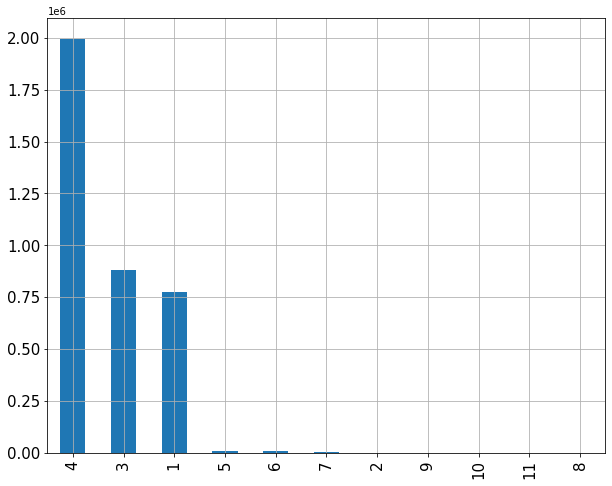

In [16]:
CountStatus = pd.value_counts(data['state_number'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

In [32]:
data[col_lists]

,state_number,mean,drate,srate,max
2286359,3,3.567000,0.000000,0.282744,3.660118
2855872,4,2.862031,0.000000,0.616852,4.451514
2852325,4,4.431932,0.000000,0.459750,4.825602
3639639,4,0.000161,0.000000,0.000000,0.000161
813559,4,2.098648,0.000000,0.324368,2.671764
...,...,...,...,...,...
3519250,4,3.637702,0.000000,1.004853,4.984320
635806,4,2.743855,0.000000,0.229829,3.810860
690909,4,2.700096,0.000000,0.233758,3.637565
2438784,1,0.082482,0.000000,0.096463,0.329928


In [34]:
data[col_lists].describe

<bound method NDFrame.describe of          state_number      mean     drate     srate       max
2286359             3  3.567000  0.000000  0.282744  3.660118
2855872             4  2.862031  0.000000  0.616852  4.451514
2852325             4  4.431932  0.000000  0.459750  4.825602
3639639             4  0.000161  0.000000  0.000000  0.000161
813559              4  2.098648  0.000000  0.324368  2.671764
...               ...       ...       ...       ...       ...
3519250             4  3.637702  0.000000  1.004853  4.984320
635806              4  2.743855  0.000000  0.229829  3.810860
690909              4  2.700096  0.000000  0.233758  3.637565
2438784             1  0.082482  0.000000  0.096463  0.329928
2054809             1  2.779895  0.238676  0.340636  4.149896

[10000 rows x 5 columns]>

In [27]:
data['mean'].value_counts()

0.000000    1170
0.000043       3
2.716815       3
0.000092       3
0.000051       3
            ... 
3.750312       1
0.062747       1
2.525239       1
0.148490       1
2.779895       1
Name: mean, Length: 8619, dtype: int64

In [28]:
data.drate.value_counts()

0.000000    9280
0.036112       3
0.036752       3
0.063248       2
0.036974       2
            ... 
0.085792       1
0.053021       1
0.059743       1
0.037866       1
0.238676       1
Name: drate, Length: 669, dtype: int64

In [29]:
data.srate.value_counts()

0.000000    521
0.446608      6
0.446823      6
0.406331      6
0.446591      6
           ... 
0.122252      1
0.104306      1
0.602866      1
5.041644      1
0.340636      1
Name: srate, Length: 8240, dtype: int64

In [53]:
data.srate.describe()

count    3.668522e+06
mean     2.955111e+00
std      7.245425e+02
min      0.000000e+00
25%      1.559700e-01
50%      2.837830e-01
75%      4.882010e-01
max      1.000000e+06
Name: srate, dtype: float64

In [54]:
data.drate.describe()

count    3.668522e+06
mean     4.455046e-01
std      6.028863e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.882353e+04
Name: drate, dtype: float64

In [31]:
data['max'].value_counts()

0.000000    1170
4.175018       3
0.000066       3
0.000051       3
2.604932       3
            ... 
4.804831       1
4.995605       1
4.051570       1
4.997645       1
4.149896       1
Name: max, Length: 8633, dtype: int64

In [49]:
data.state_number.value_counts()

4     1996208
3      878697
1      775168
5        8950
6        6387
7        2476
2         526
9          70
10         16
11         16
8           8
Name: state_number, dtype: int64